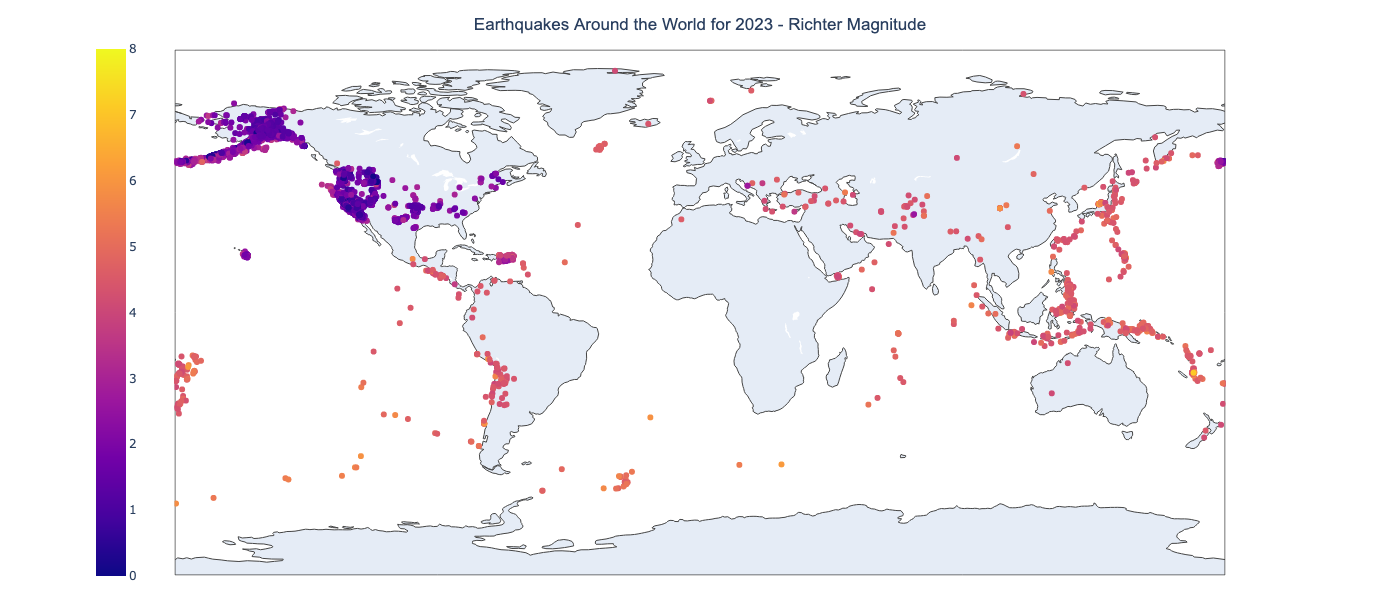

In [8]:
import pandas as pd
import requests
from io import StringIO
import plotly.express as px
from matplotlib import rcParams

# Set the font
font = 'sans-serif'  
rcParams['font.family'] = font
rcParams['font.size'] = 12


# URL to the dataset
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"

# Using requests to get the content of the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Read the content of the response into a pandas DataFrame
    earthquake_data = pd.read_csv(StringIO(response.text))
    # Display the first few rows of the DataFrame
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")

earthquake_data

# Drop rows with missing or invalid values in the 'mag' column
data = earthquake_data.dropna(subset=['mag'])
data = data[data.mag >= 0]


# Create scatter map
fig = px.scatter_geo(data, lat='latitude', lon='longitude', color='mag',
                     hover_name='place', title='Earthquakes Around the World for 2023',
                     color_continuous_scale=px.colors.sequential.Plasma,  # or any other color scale
                     range_color=[0, 8])  # Set the range for the color scale


# Update the layout to set the figure size - increase the width and height as desired
fig.update_layout(width=1400, height=600)

# Reduce margins to make the geographical map larger within the figure
fig.update_layout(margin={"r":25,"t":50,"l":25,"b":25})

# Adjust the position of the color scale and update the title to "Magnitude (Richter)"
fig.update_layout(
    coloraxis_colorbar=dict(
        x=-0.005,  # Adjust this value to move the color scale to the left
        title=''  # Set the title for the color scale
    )
)

fig.update_layout(
    title={
        'text': "Earthquakes Around the World for 2023 - Richter Magnitude",
        'y':0.97,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'size': 17,  # Adjust the font size as needed
            'family': font,  # You can change the font family if desired
        }
    },
    coloraxis_colorbar={
        'x': 0.045,  # Horizontal position of the color scale
        'y': 0.5,   # Starting vertical position of the color scale, adjust as needed
        'len': 1.042  # Length of the color scale, as a fraction of figure height, adjust as needed
    }
)

# Display the figure as a PNG image
fig.show(renderer='png')